# Import Libraries

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import datetime
import pickle

In [56]:
# Show plots in jupyter notebook
%matplotlib inline

In [57]:
# Set plot style
sns.set(color_codes=True)

In [58]:
# Set maximum number of columns to be displayed
pd.set_option('display.max_columns', 100)

# The Dataset 

In [59]:
training_data = pd.read_csv('ml_case_training_data.csv')
churn_data = pd.read_csv('ml_case_training_output.csv')
hist_data = pd.read_csv('ml_case_training_hist_data.csv')  
data = pd.merge(training_data, churn_data, how='inner', on='id')
hist_data = pd.merge(hist_data, data[['id', 'churn']], how='inner', on = 'id')

data.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [60]:
hist_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0


## =- Data Types

In [61]:
pd.DataFrame({"Data type":data.dtypes})

,Data type
id,object
activity_new,object
campaign_disc_ele,float64
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,object
date_end,object
date_first_activ,object


In [62]:
pd.DataFrame({"Data type":hist_data.dtypes})

,Data type
id,object
price_date,object
price_p1_var,float64
price_p2_var,float64
price_p3_var,float64
price_p1_fix,float64
price_p2_fix,float64
price_p3_fix,float64
churn,int64


## =- Statistics

In [63]:
data.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


The data contain multiple features with Nan values and skewed data as well.

In [64]:
hist_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,193002.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436,0.099009
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279,0.298675
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389,0.000000
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221,1.000000


The negative values in the price column might be corruped data and we will change
them to positive when cleaning the data.


# Visualization

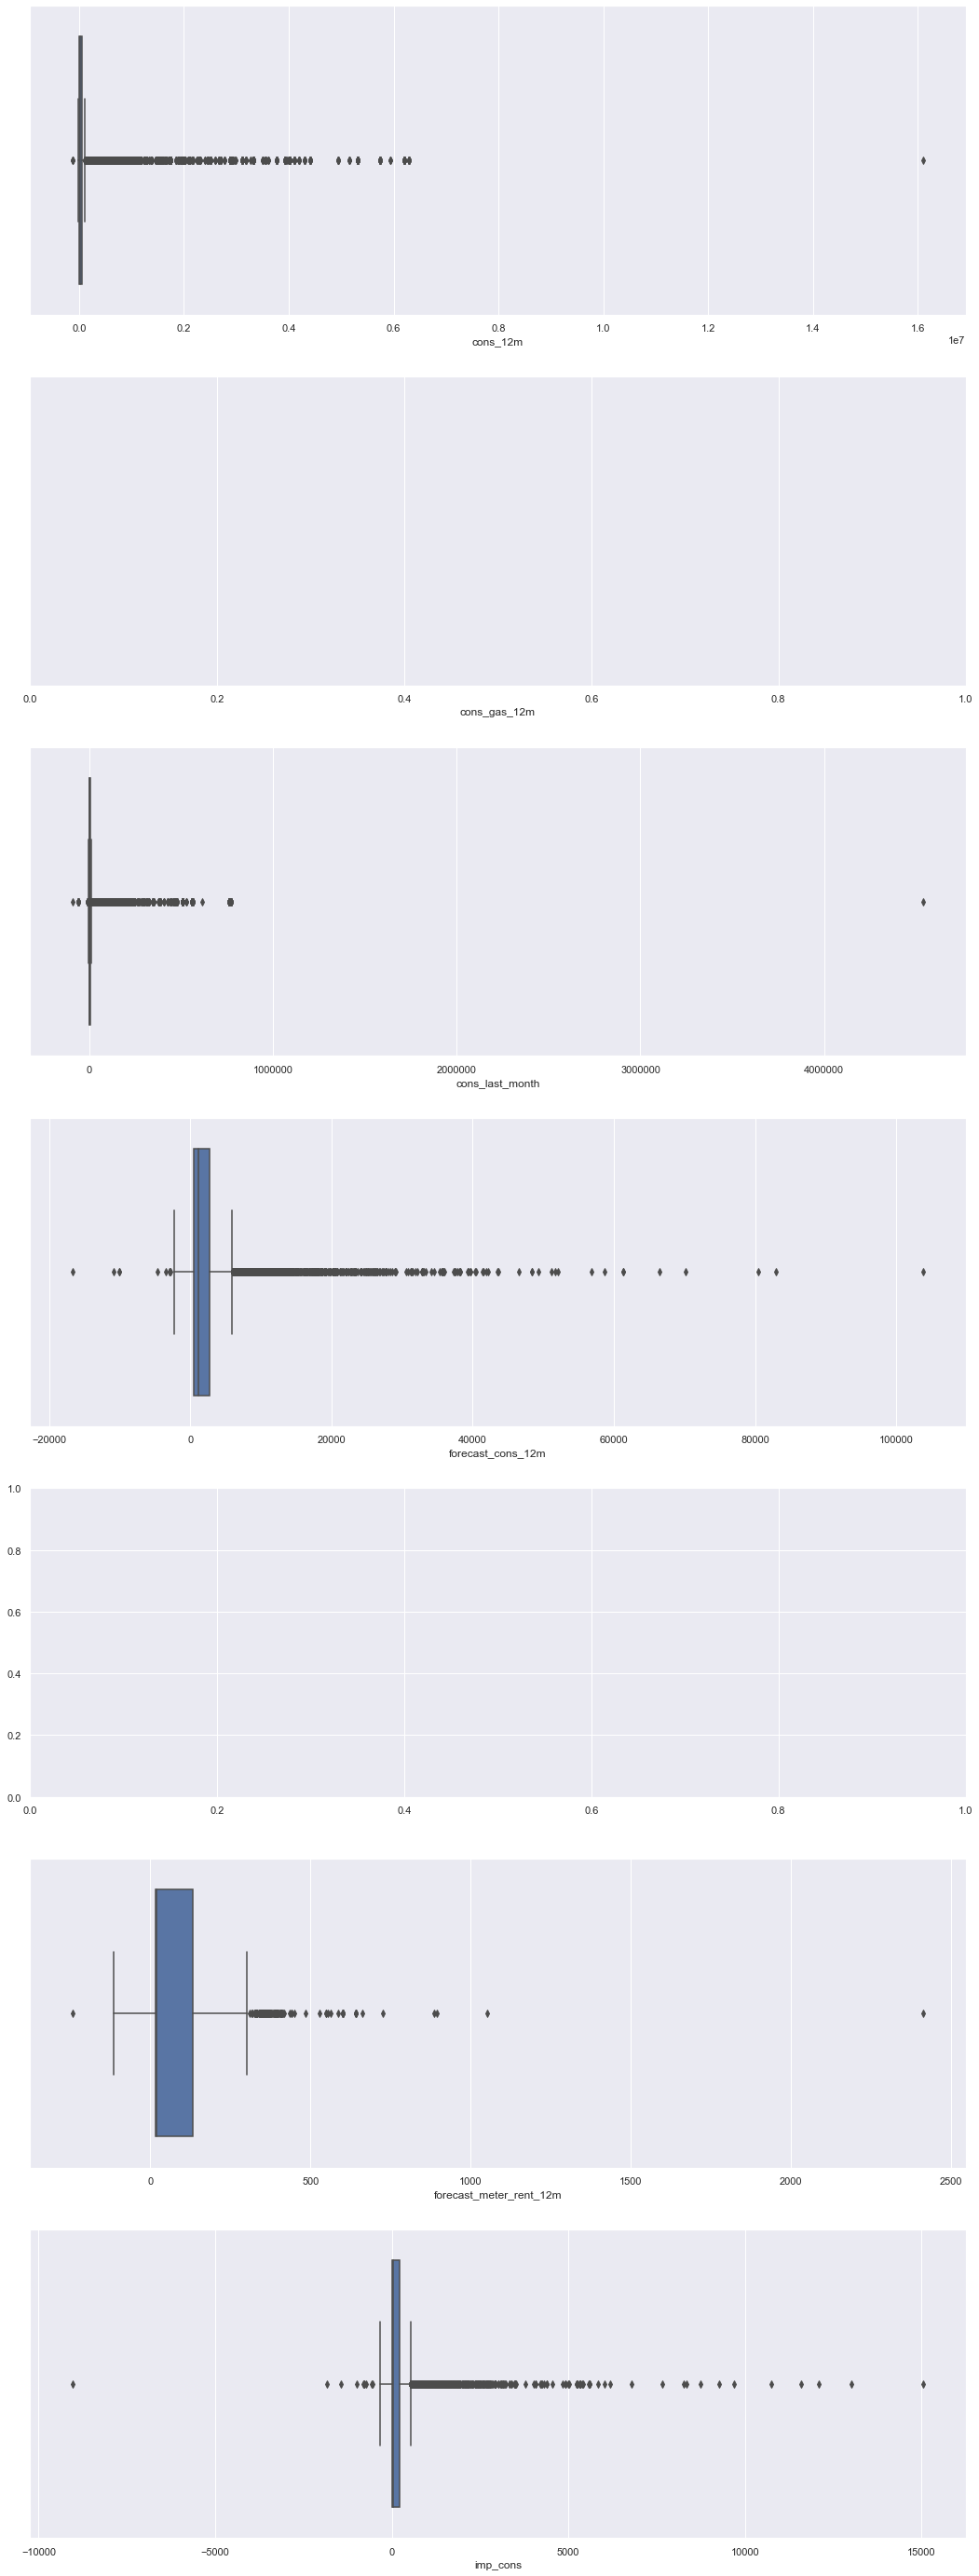

In [65]:
ig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((data["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((data[data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((data["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((data["forecast_cons_12m"].dropna()), ax=axs[3])
#sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((data["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((data["imp_cons"].dropna()), ax=axs[6])
plt.show()

Deep diving a little bit on the main parameters

## =- Churn

In [66]:
churn = data[["id","churn"]]

# Rename columns for visualization purposes
churn.columns = ["Companies", "churn"]

In [67]:

def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(kind="bar", stacked=True, figsize=size_, rot=rot_, title=title_)
    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """
    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(value,
                    ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
                    color=colour,
                    size=textsize,)

In [68]:
churn_total = churn.groupby(churn["churn"]).count()
churn_percentage = churn_total/churn_total.sum()*100

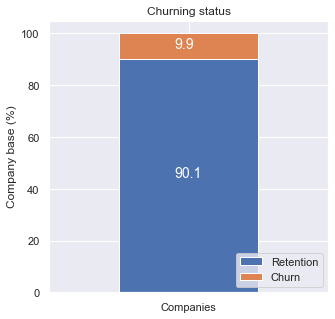

In [69]:
plot_stacked_bars(churn_percentage.transpose(),"Churning status", (5,5), legend_="lower right")

About 10% of the of total customers have churned. (This sounds about right)

## =- SME activity

Let's show the activity distribution of the companies as well as the sales channel.
Intuitively this might be an important predictive feature for energy consumption

In [70]:
activity = data[["id","activity_new", "churn"]]
activity = activity.groupby([activity["activity_new"],
                             activity["churn"]])["id"].count().unstack(level=1).sort_values(by=[0], ascending=False)

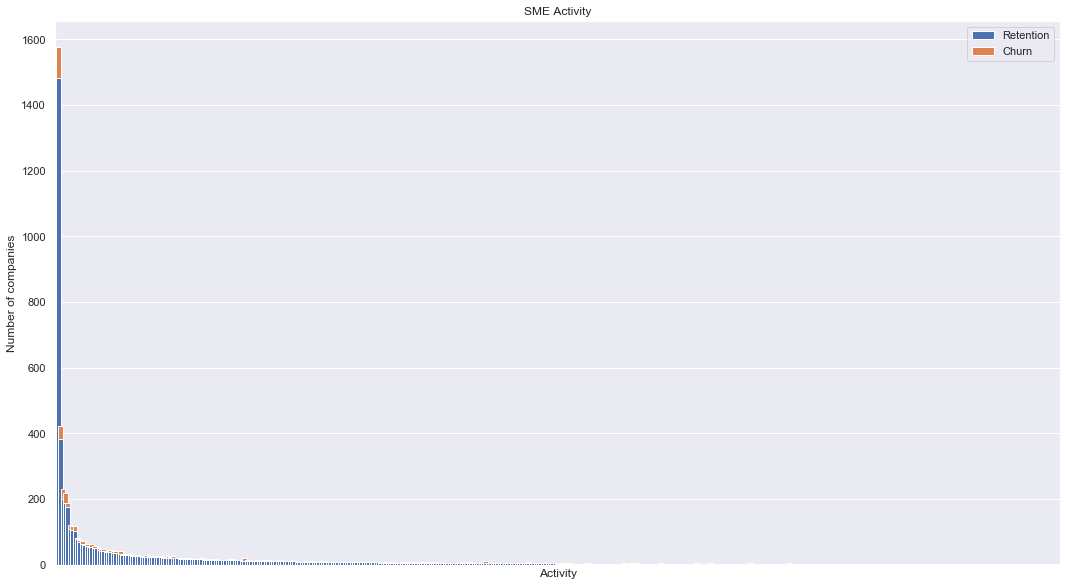

In [71]:
activity.plot(kind="bar",
              figsize=(18, 10),
              width=2,
              stacked=True,
              title="SME Activity")
# Labels
plt.ylabel("Number of companies")
plt.xlabel("Activity")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Remove the label for the xticks as the categories are encoded and we can't draw any meaning from them yet
plt.xticks([])
plt.show()


We see churn is not specifically related to any SME cateogry in particular.

## =- Sales channel

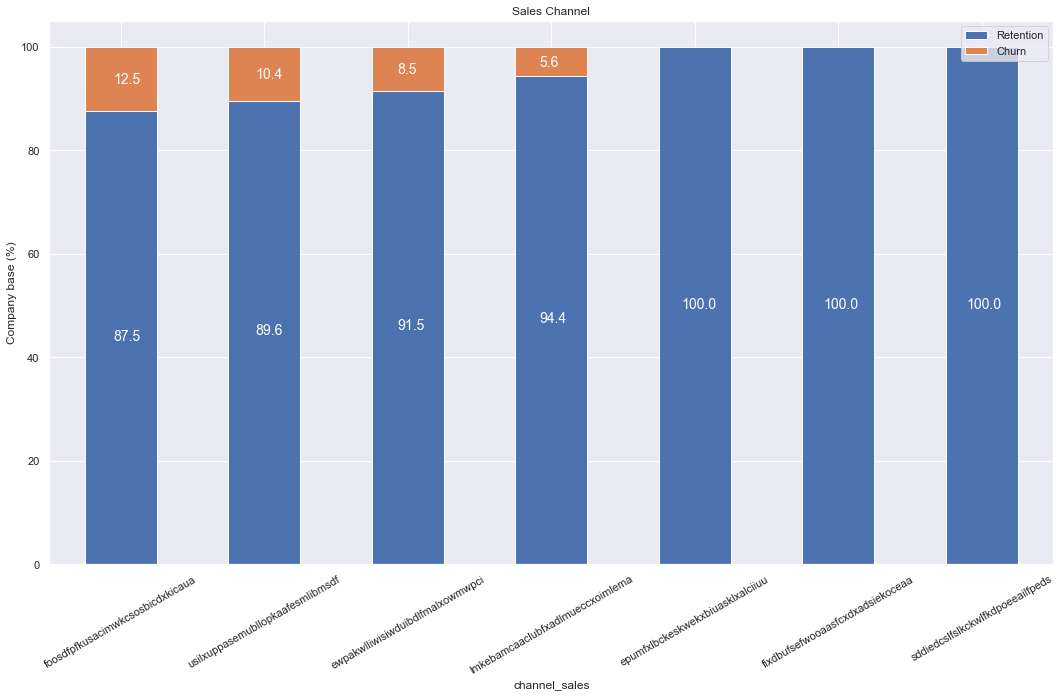

In [72]:
channel = data[["id","channel_sales", "churn"]]
channel = channel.groupby([channel["channel_sales"],
                           channel["churn"]])["id"].count().unstack(level=1).fillna(0)

channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(channel_churn, "Sales Channel", rot_=30)

Nothing out of the normal form this graph above.
If we look at it percentage-wise

## =- Consumption

Let's see the distribution of the consumption over the last year and last month

In [73]:
consumption = data[["id","cons_12m", "cons_gas_12m","cons_last_month", "imp_cons", "has_gas", "churn"]]
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
                         "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

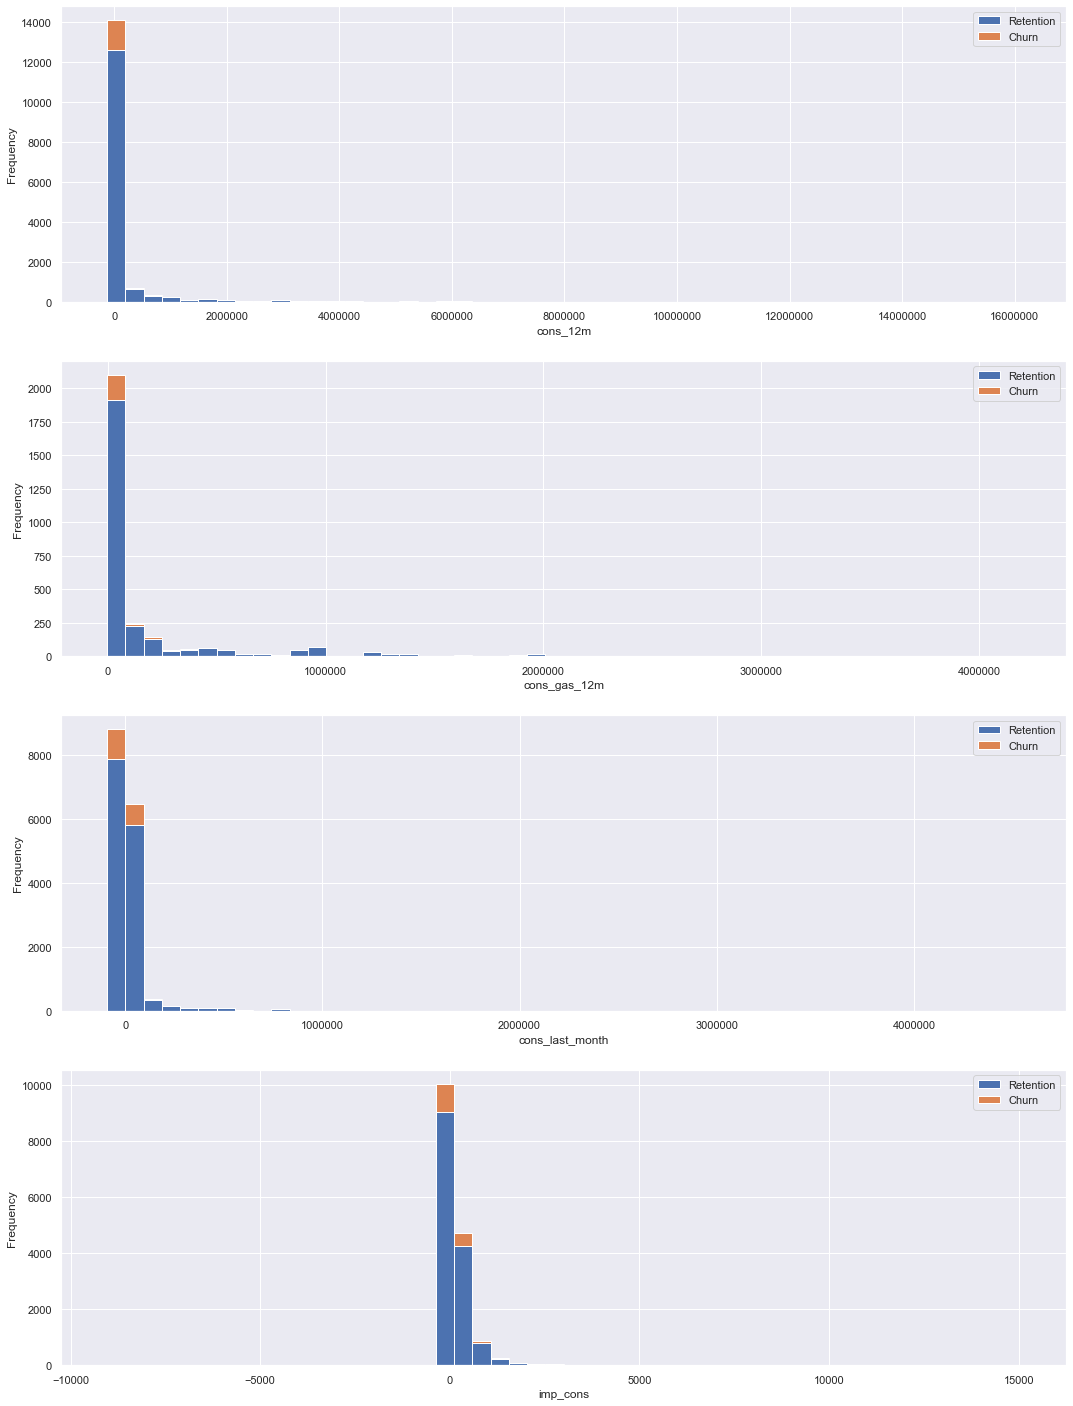

In [74]:
 fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
plot_distribution(consumption, "cons_12m", axs[0])
# Note that the gas consumption must have gas contract
plot_distribution(consumption[consumption["has_gas"] == "t"], "cons_gas_12m", axs[1])
plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])

We can clearly see in here that the consumption data is highly skewed to the right, presenting a very long right-tail towards the higher values of the
distribution.
The values on the higher end and lower ends of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more
detail.

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median,
third quartile (Q3), and “maximum”). It can tell us about our outliers and what their values are. It can also tell us if our data is symmetrical, how tightly
our data is grouped, and if and how our data is skewed.

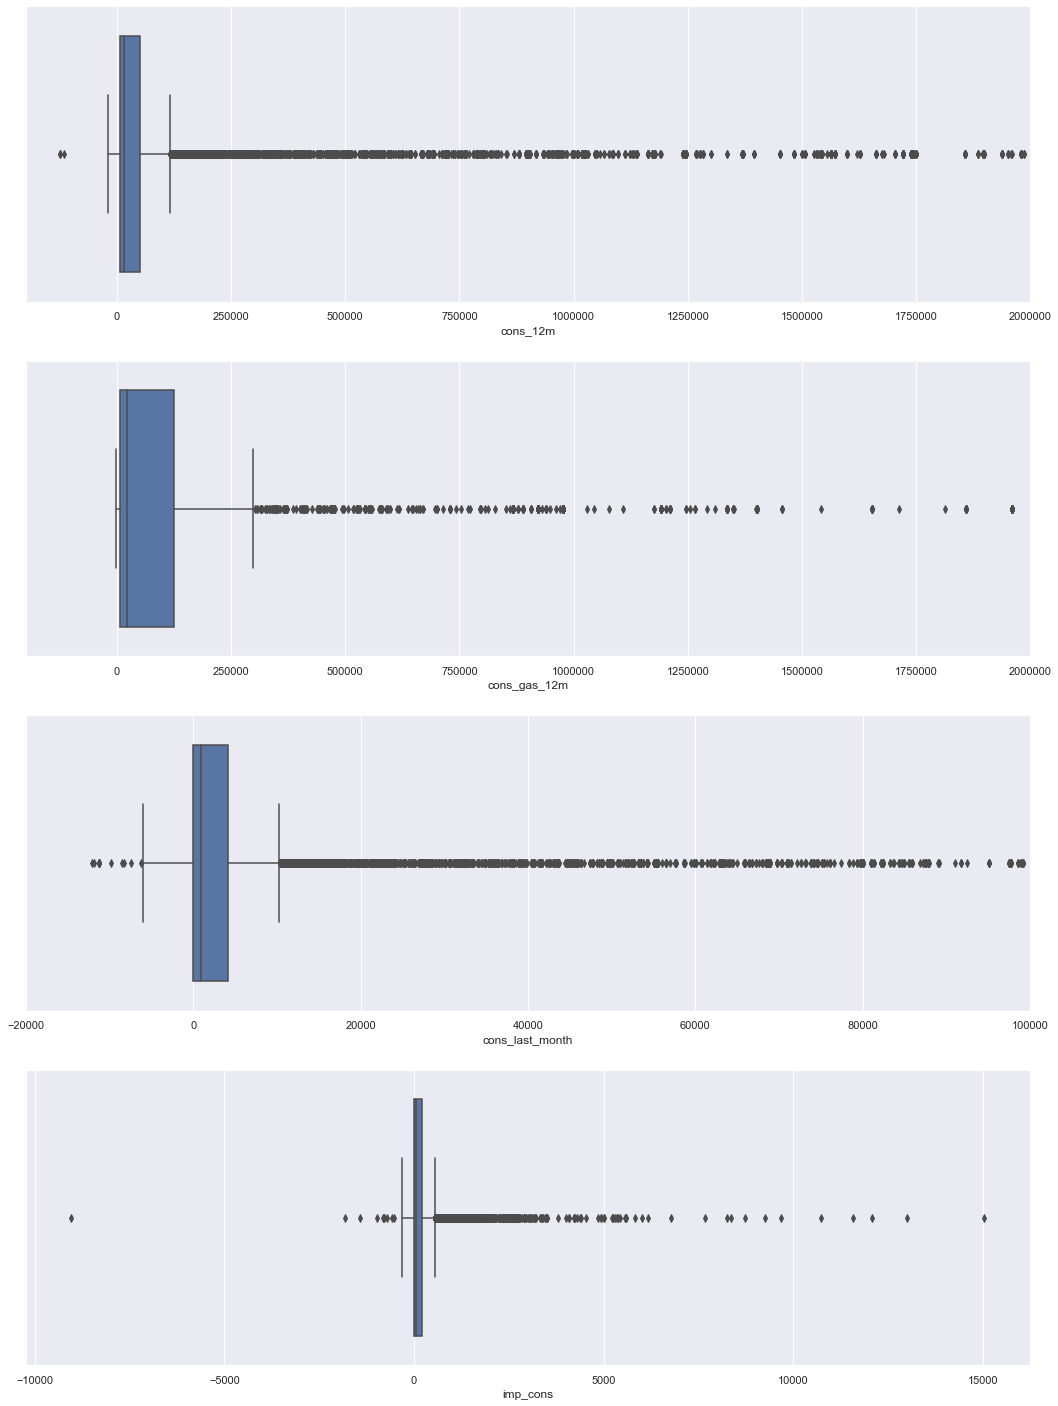

In [75]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])
# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
# Set x-axis limit
axs[0].set_xlim(-200000, 2000000)
axs[1].set_xlim(-200000, 2000000)
axs[2].set_xlim(-20000, 100000)
plt.show()

It is very clear now that we have a highly skewed distribution, and several outliers.

## =- Dates 

In [76]:
dates = data[["id","date_activ","date_end", "date_modif_prod","date_renewal","churn"]].copy()

# Transform date columns to datetime type
dates["date_activ"] = pd.to_datetime(dates["date_activ"], format='%Y-%m-%d')
dates["date_end"] = pd.to_datetime(dates["date_end"], format='%Y-%m-%d')
dates["date_modif_prod"] = pd.to_datetime(dates["date_modif_prod"], format='%Y-%m-%d')
dates["date_renewal"] = pd.to_datetime(dates["date_renewal"], format='%Y-%m-%d')



In [77]:
def plot_dates(dataframe, column, fontsize_=12):
    """
    Plot monthly churn and retention distribution
    """
    # Group by month
    temp = dataframe[[column,
                      "churn","id"]].set_index(column).groupby([pd.Grouper(freq='M'), "churn"]).count().unstack(level=1)
    # Plot
    ax=temp.plot(kind="bar", stacked=True, figsize=(18,10), rot=0)
    # Change x-axis labels to months
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    # Change xlabel size
    plt.xticks(fontsize=fontsize_)
    # Rename y-axis
    plt.ylabel("Number of companies")
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right")
    plt.show()

def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:1]
    if label.month_name() == "January":
        month += f'\n{label.year}'
        return month

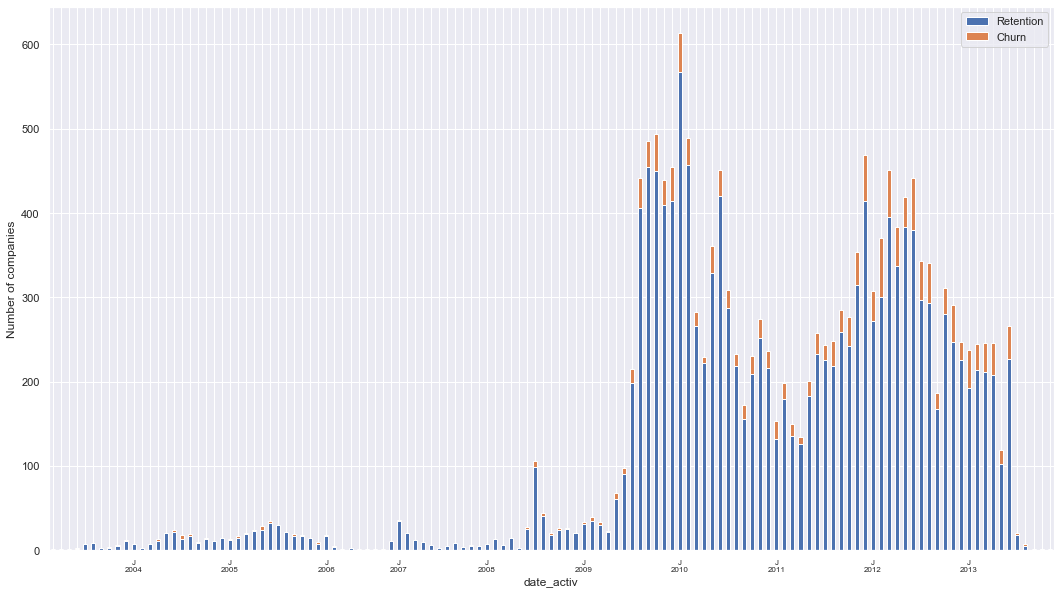

In [78]:
plot_dates(dates, "date_activ", fontsize_=8)

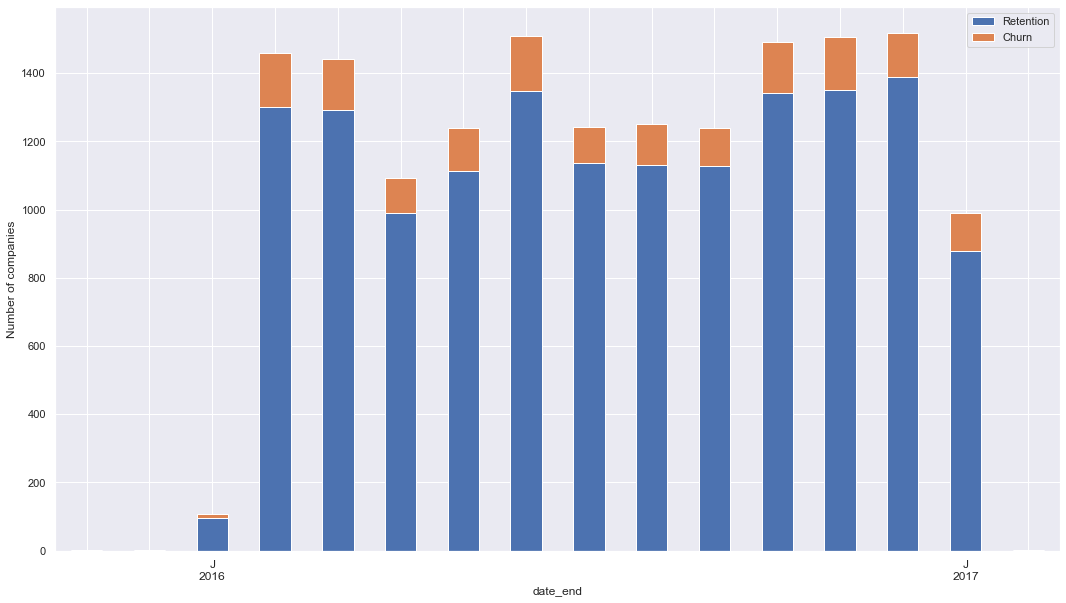

In [79]:
plot_dates(dates, "date_end")


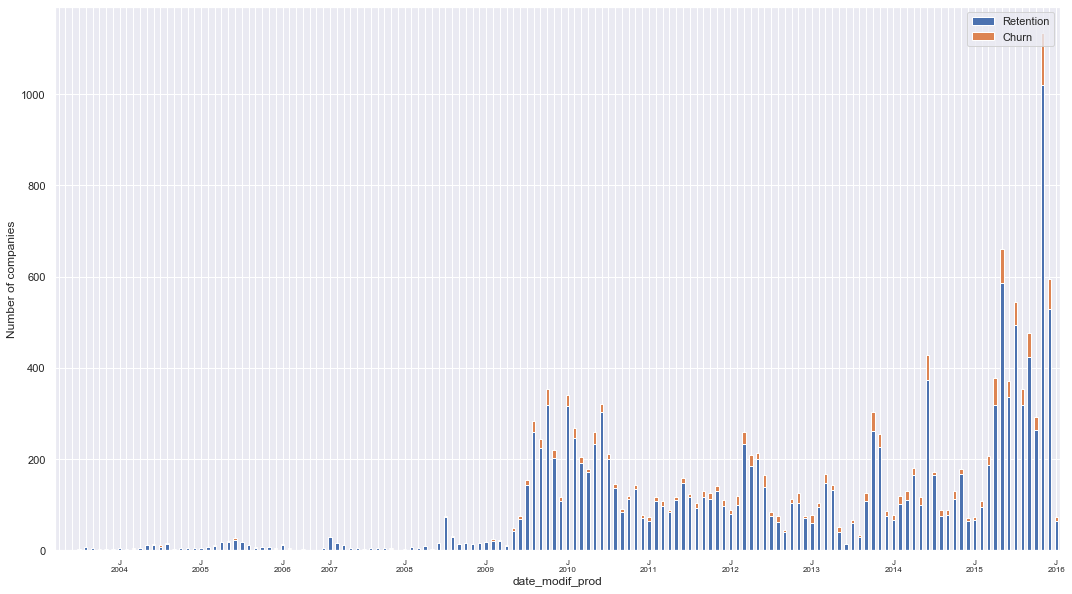

In [80]:
plot_dates(dates, "date_modif_prod", fontsize_=8)

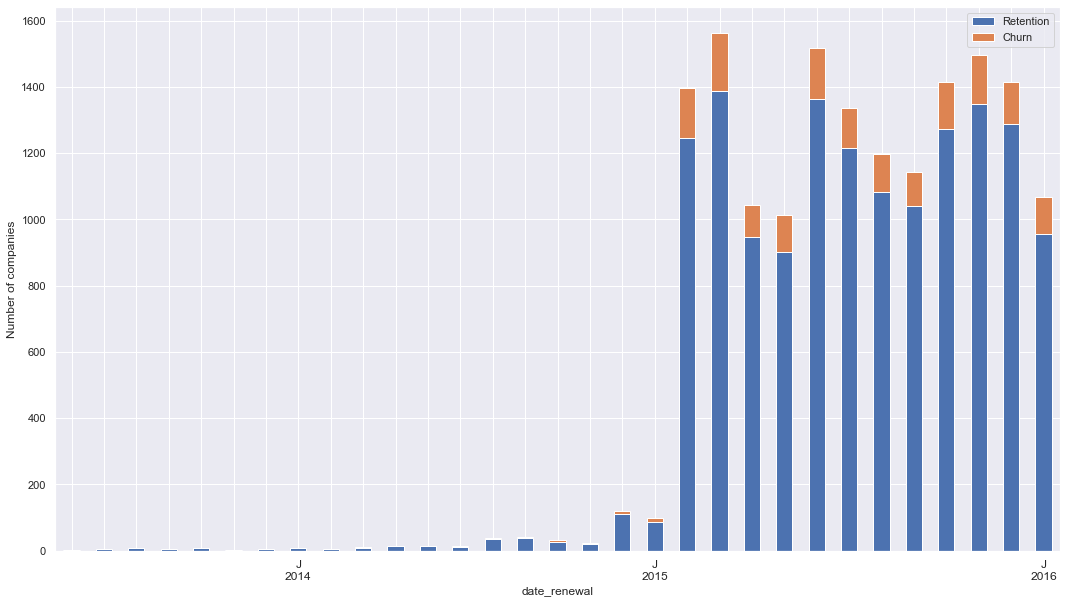

In [81]:
plot_dates(dates, "date_renewal")

## =- Forecast 

In [82]:
forecast = data[["id","forecast_base_bill_ele","forecast_base_bill_year",
 "forecast_bill_12m","forecast_cons","forecast_cons_12m",
 "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
 "forecast_price_energy_p1","forecast_price_energy_p2",
 "forecast_price_pow_p1","churn"]]

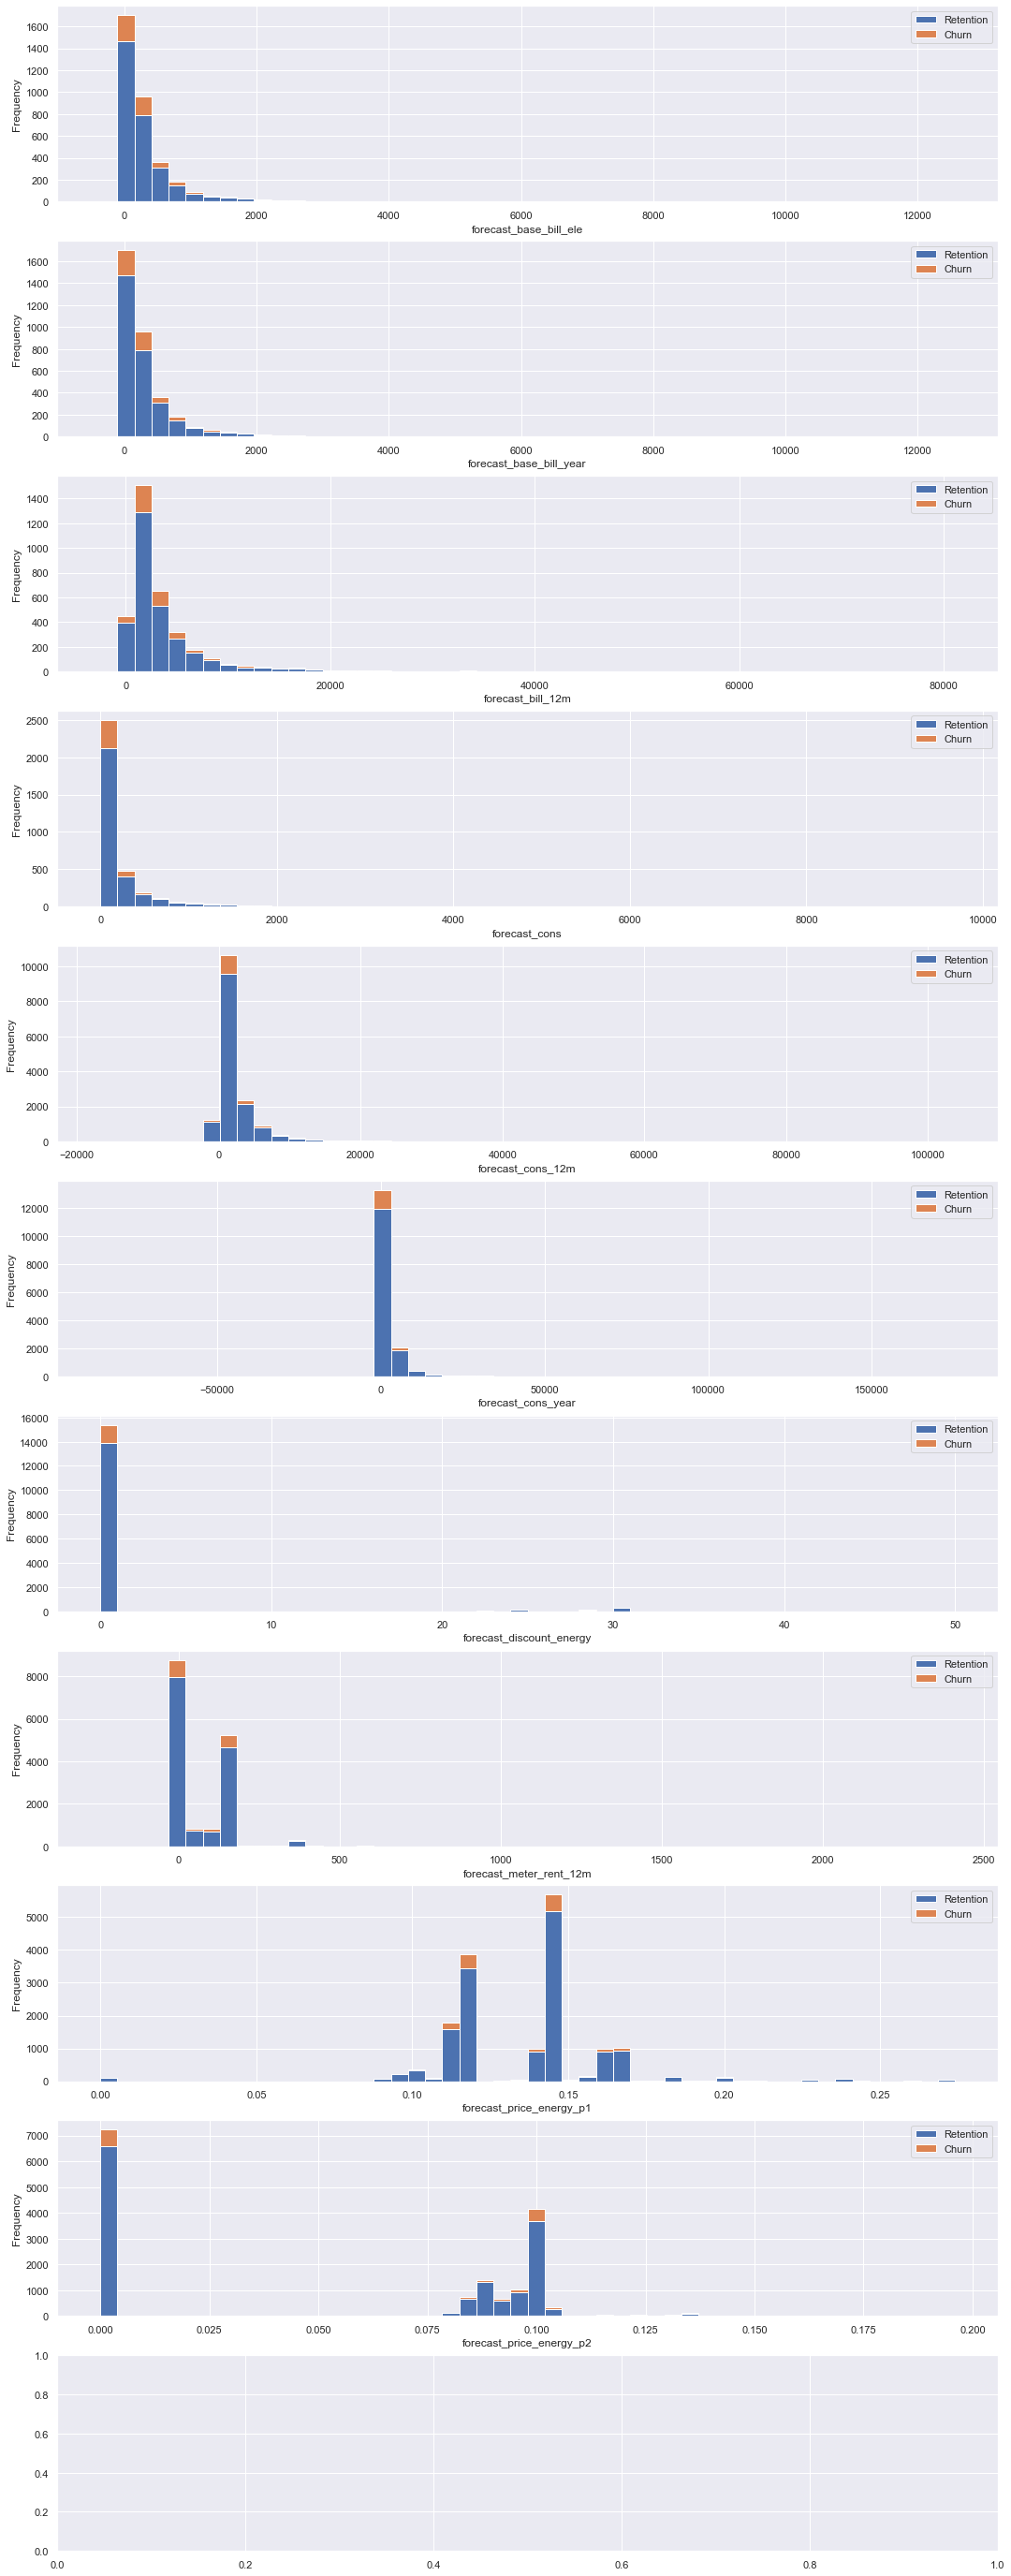

In [83]:
fig, axs = plt.subplots(nrows=11, figsize=(18,50))
# Plot histogram
plot_distribution(data, "forecast_base_bill_ele", axs[0])
plot_distribution(data, "forecast_base_bill_year", axs[1])
plot_distribution(data, "forecast_bill_12m", axs[2])
plot_distribution(data, "forecast_cons", axs[3])
plot_distribution(data, "forecast_cons_12m", axs[4])
plot_distribution(data, "forecast_cons_year", axs[5])
plot_distribution(data, "forecast_discount_energy", axs[6])
plot_distribution(data, "forecast_meter_rent_12m", axs[7])
plot_distribution(data, "forecast_price_energy_p1", axs[8])
plot_distribution(data, "forecast_price_energy_p2", axs[9])

Similarly to the consumption plots, we can observe that a lot of the variables are highly skewed to the right, creating a very long tail on the higher
values.
We will make some transformations to correct for this skewness

## =- Contract Type (Electricity, Gas)

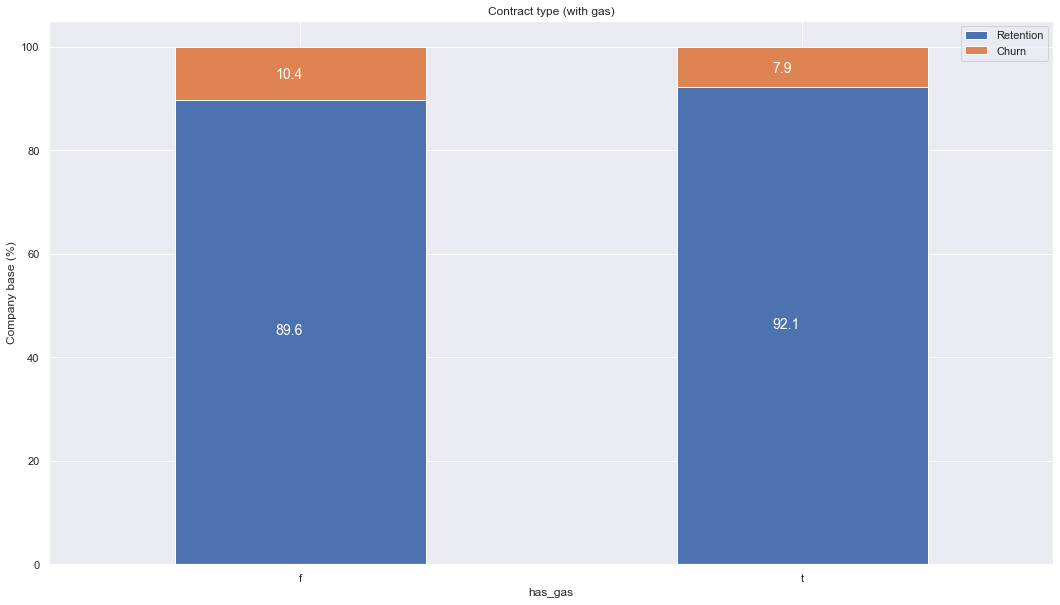

In [84]:
contract_type = data[["id", "has_gas", "churn"]]
contract = contract_type.groupby([contract_type["churn"],
                                  contract_type["has_gas"]])["id"].count().unstack(level=0)

contract_percentage = (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(contract_percentage, "Contract type (with gas)")

## =- Margins

In [85]:
margin = data[["id","margin_gross_pow_ele","margin_net_pow_ele","net_margin"]]

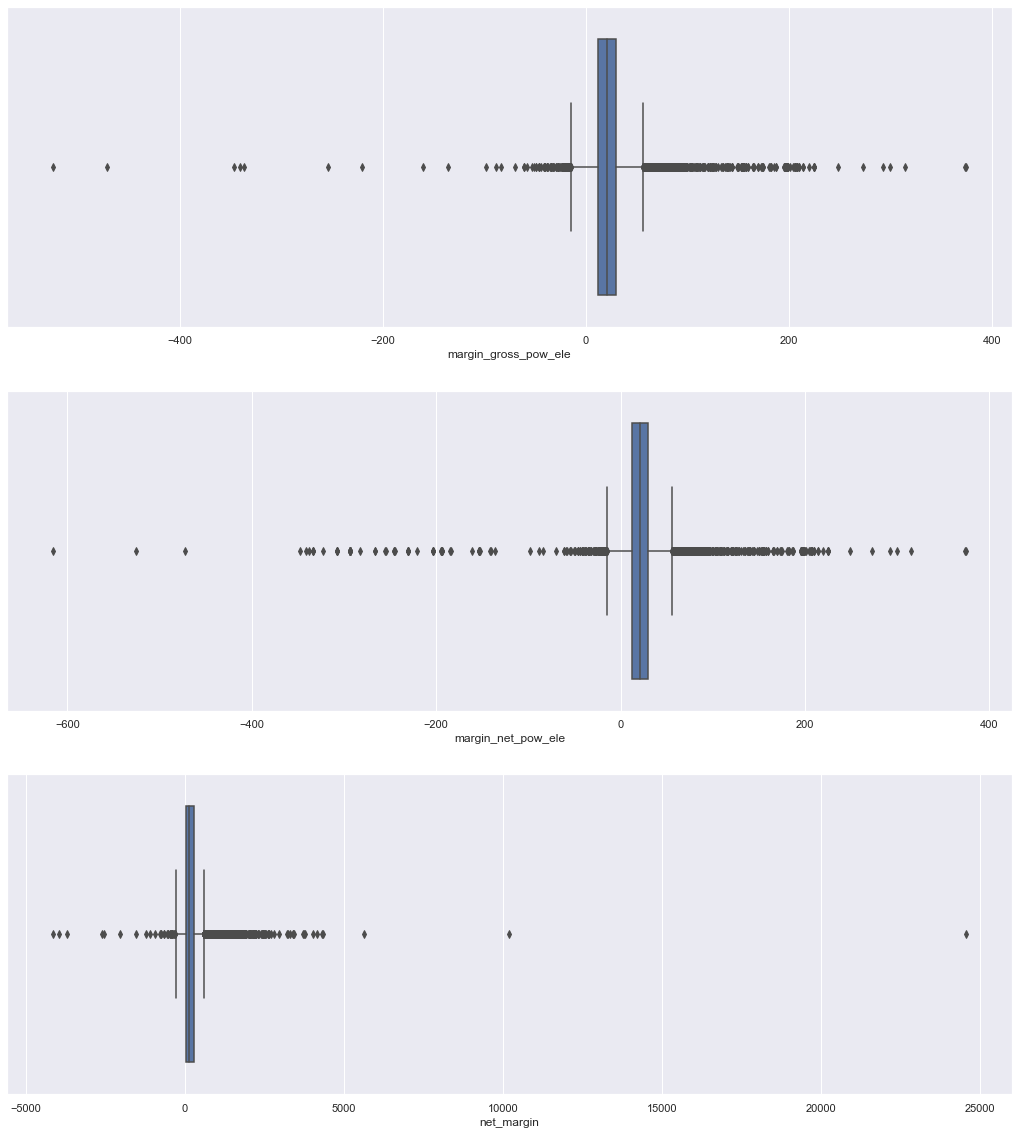

In [86]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

We can observe a few outliers in here as well.

## =- Subscribed power

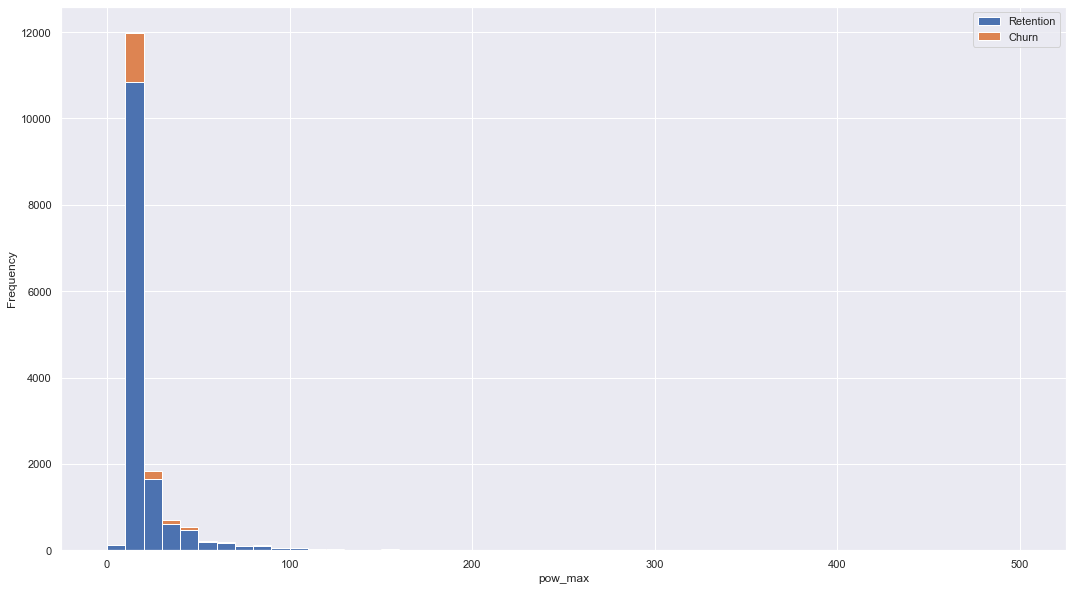

In [87]:
power = data[["id","pow_max", "churn"]].fillna(0)

fig, axs = plt.subplots(nrows=1, figsize=(18,10))
plot_distribution(power, "pow_max", axs)

## =- Others

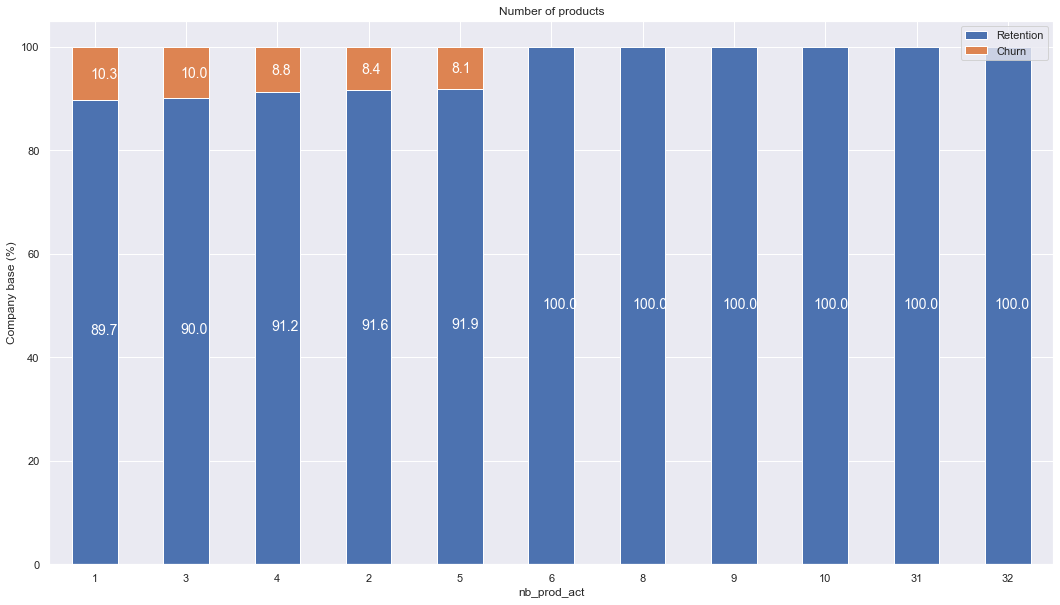

In [88]:
others = data[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(products_percentage, "Number of products")

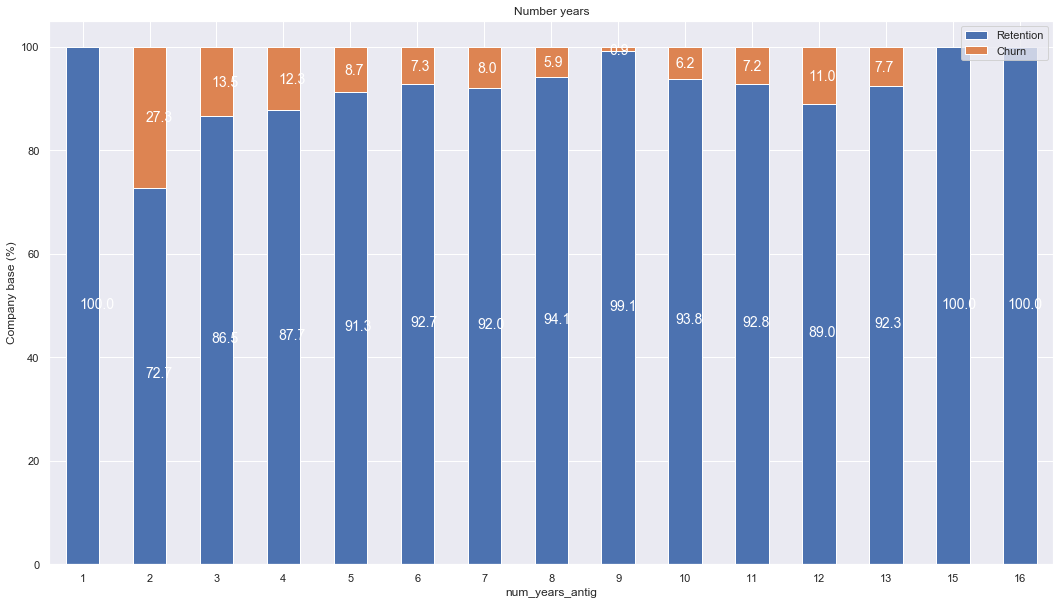

In [89]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")


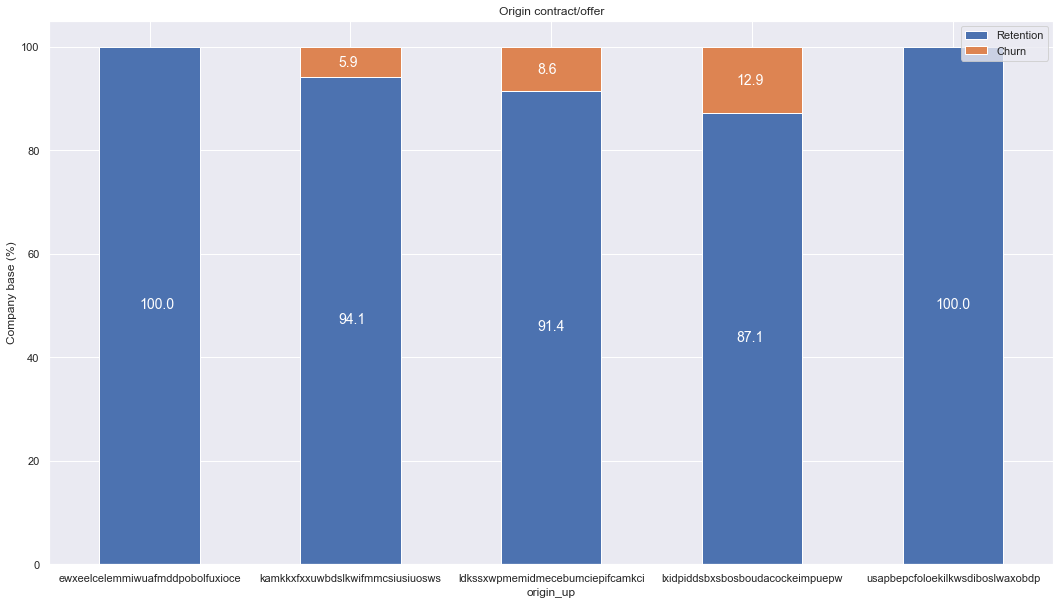

In [90]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

# Cleaning Data

## =- Check for Duplicate

In [91]:
data[data.duplicated()]

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


In [92]:
hist_data[hist_data.duplicated()]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn


we dont have duplicated values in the dataset.

## =- Check for Missing Values

From the above dataset head , it clearly shows that it contain missing valus as Nan and 0. I checked which columm/feature have the missing value and count the occurance the same time.
The result shows most of the feature contain missing values. 

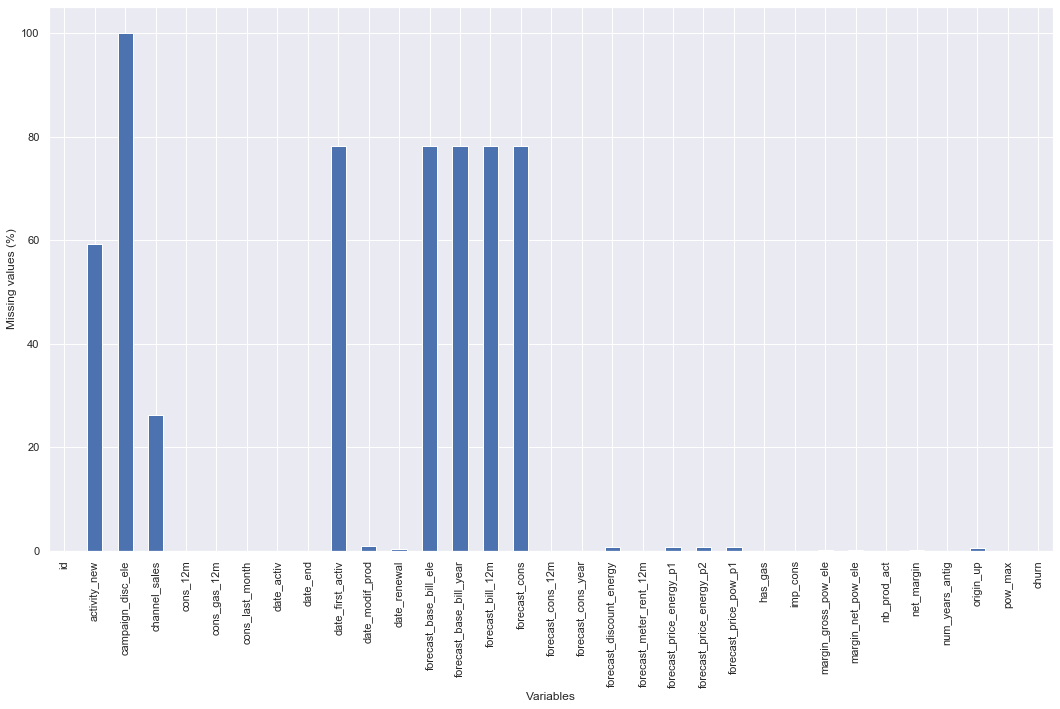

In [93]:
# Plot missing data
(data.isnull().sum()/len(data.index)*100).plot(kind="bar", figsize=(18,10))
# Set axis labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

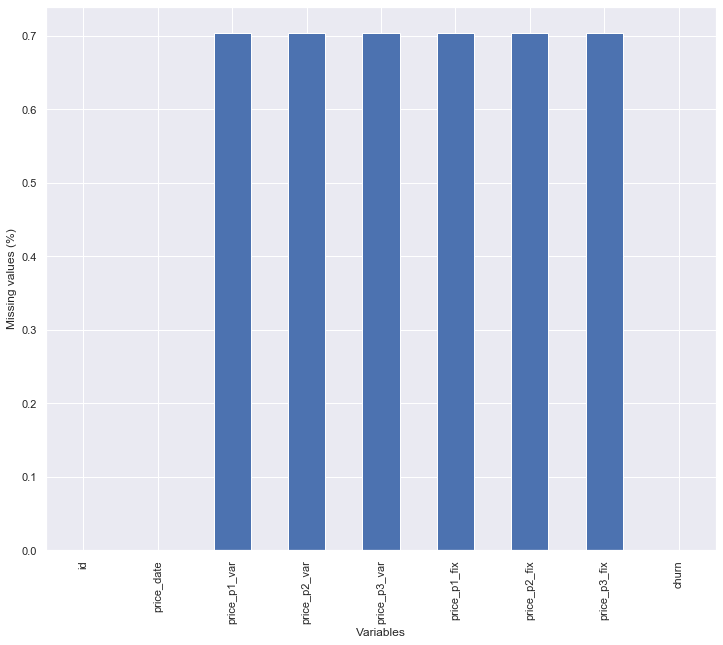

In [94]:
# Plot missing data
(hist_data.isnull().sum()/len(hist_data.index)*100).plot(kind="bar", figsize=(12,10))
# Set axis labels
plt.xlabel("Variables")
plt.ylabel("Missing values (%)")
plt.show()

## =- Filling/Removing Missing Values

To deal with missing values three different method used.

1- Drop Columns with Missing Values
2- Imputation
3- An Extension To Imputation

All of them have their own limitation for implementation.

In [95]:
#Missing values of a feature greater than 65% is drpped
print('Missing Value Occurence Greater than 65%    Columns Name')
for c in data.columns:
    null_occurance = data[c].isnull().sum().sum()
    
    # #drop those Column with 65% to 100% values as NaN
    if (null_occurance > int(len(data[c])*0.65)):
        data = data.drop(c, axis=1)
        print('\t', null_occurance,'\t\t\t\t',c)

Missing Value Occurence Greater than 65%    Columns Name
	 16096 				 campaign_disc_ele
	 12588 				 date_first_activ
	 12588 				 forecast_base_bill_ele
	 12588 				 forecast_base_bill_year
	 12588 				 forecast_bill_12m
	 12588 				 forecast_cons


In [96]:
#Dealing with Missing Dates
data.loc[data["date_modif_prod"].isnull(),"date_modif_prod"] = data["date_modif_prod"].value_counts().index[0]
data.loc[data["date_end"].isnull(),"date_end"] = data["date_end"].value_counts().index[0]
data.loc[data["date_renewal"].isnull(),"date_renewal"] = data["date_renewal"].value_counts().index[0]

In [97]:
# #categorical imputation method 1 (Most common values)
# data[['activity_new', 'channel_sales', 'origin_up']]= data[['activity_new', 
#                             'channel_sales', 'origin_up']].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Numeric Imputation method 1
num_col_with_missing_val = ['forecast_discount_energy', 
                'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 
                                            'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_data = pd.DataFrame(my_imputer.fit_transform(data[num_col_with_missing_val]))
                            
data[num_col_with_missing_val] = imputed_data
data.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [98]:
#Imputing missing values in the hist_data using Median method
for el in hist_data:
    if (el=='id' or el=='price_date'):
        continue
    hist_data.loc[hist_data[el].isnull(),el] = hist_data[el].median()

hist_data.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0.0


## =- Data Conversion

the dataset contain multiple features with different data types, most of the columns 'float' type data, some are in 'int' formate while others in 'categorical or alphanumeric' formate. We will convert them so the model learn from them.

In [99]:
# Transform date columns to datetime type
data["date_activ"] = pd.to_datetime(data["date_activ"], format='%Y-%m-%d')
data["date_end"] = pd.to_datetime(data["date_end"], format='%Y-%m-%d')
data["date_modif_prod"] = pd.to_datetime(data["date_modif_prod"], format='%Y-%m-%d')
data["date_renewal"] = pd.to_datetime(data["date_renewal"], format='%Y-%m-%d')

hist_data["price_date"] = pd.to_datetime(hist_data["price_date"], format='%Y-%m-%d')

there are negative values for price_p1_fix , price_p2_fix and price_p3_fix .
Further exploring on those we can see there are only about 10 entries which are negative. This is more likely to be due to corrupted data rather than
a "price discount".
We will replace the negative values with the median (most frequent value)

In [100]:
hist_data[(hist_data.price_p1_fix < 0) | (hist_data.price_p2_fix < 0) | (hist_data.price_p3_fix < 0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166,0.0
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166,0.0
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166,0.0
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166,1.0
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172,0.0
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166,0.0
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172,1.0
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000,0.0
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166,0.0
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166,0.0


In [101]:
hist_data.loc[hist_data["price_p1_fix"] < 0,"price_p1_fix"] = hist_data["price_p1_fix"].median()
hist_data.loc[hist_data["price_p2_fix"] < 0,"price_p2_fix"] = hist_data["price_p2_fix"].median()
hist_data.loc[hist_data["price_p3_fix"] < 0,"price_p3_fix"] = hist_data["price_p3_fix"].median()

# Pickling

In [102]:
if not os.path.exists(os.path.join("..", "processed_data")):
    os.makedirs(os.path.join("..", "processed_data"))

#I saved the data as a picke file in 'train_data.pkl' and 'hist_data.pkl'    
PICKLE_TRAIN_DIR = os.path.join("..", "processed_data", "train_data.pkl")
PICKLE_HISTORY_DIR = os.path.join("..", "processed_data", "hist_data.pkl")

pd.to_pickle(data, PICKLE_TRAIN_DIR)
pd.to_pickle(hist_data, PICKLE_HISTORY_DIR)